## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

import matplotlib

## The Data

In [2]:
import os
print(os.getenv("Country_path"))
## Please add the Country_path  to your environment variables where CSV files are stored
var = input("Enter the Country: ")
df_Usa = pd.read_csv(os.getenv('Country_path') + '\\' + var + '_history_data.csv')
df_Usa.head()

C:\Users\manudeep\Desktop\Fall_2020\EECS_731\Project\731_Final_Project\Contries_Data
Enter the Country: USa


,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,United States,01/01/1970,35.0,28.1,32.0,20.9,NaN,0.00,NaN,13.9,NaN,12.8,77.9,61.54,Overcast
1,United States,01/02/1970,41.1,25.1,33.2,18.1,NaN,0.00,NaN,17.2,NaN,10.0,37.5,59.52,Partially cloudy
2,United States,01/03/1970,38.0,26.9,33.6,15.5,NaN,0.05,NaN,17.2,NaN,10.5,73.3,67.34,"Rain, Partially cloudy"
3,United States,01/04/1970,33.2,21.8,27.0,10.9,NaN,0.00,NaN,17.2,NaN,9.5,0.0,51.89,Clear
4,United States,01/05/1970,44.0,20.0,30.2,11.1,NaN,0.00,NaN,15.0,NaN,9.3,47.1,65.60,Partially cloudy


### Random Slice of Data
<hr>

In [3]:
df_Usa.sample(5)

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
3044,United States,05/03/1978,70.1,50.1,60.1,NaN,NaN,0.00,NaN,17.2,NaN,19.8,22.6,31.94,Clear
18364,United States,05/05/2020,57.6,49.6,54.4,47.7,NaN,0.19,NaN,12.4,15.0,9.3,29.5,56.14,"Rain, Partially cloudy"
684,United States,11/16/1971,64.1,47.0,54.6,44.9,NaN,0.00,NaN,20.8,NaN,10.3,24.2,71.55,Clear
12089,United States,02/13/2003,38.0,24.9,31.8,13.5,NaN,0.00,NaN,26.4,NaN,9.9,21.7,32.24,Clear
16523,United States,04/21/2015,69.9,57.1,63.5,NaN,NaN,0.16,NaN,24.5,35.5,9.9,56.4,42.12,"Rain, Partially cloudy"


<b> Feature Description </b><br>
<hr>

`Temperature`: Average Temp (deg F)<br>
`Precipitation`: Water that is falling out of the sky, this could be rain, drizzle, snow, sleet, hail or something rarer. (Inches)<br>
`Wind Chill` - the cooling effect of wind blowing on a surface(Temp a human feels becuase of heat is loss from the exposed skin)	(deg F)<br>
`Heat Index` - The Heat Index is a measure of how hot it really feels when relative humidity is factored in with the actual air temperature. (deg F)<br>
`Snow Depth` -  Determine the depth of the new and old snow remaining on the ground at observation time. (Inches)<br>
`Wind Speed` - Speed of wind in (Miles/hour)<br>
`Wind Gust` -  brief increase in the speed of the wind (Miles/hour) <br>
`Visibility` - visibility is a measure of the distance at which an object or light can be clearly discerned (Miles)<br>
`Cloud Cover` - fraction of the sky obscured by clouds when observed from a particular location ()<br>
`Relative Humidity` - Relative humidity is the ratio of the partial pressure of water vapor to the equilibrium vapor pressure of water at a given temperature<br>
`Condition` - Condition of the whole day.

In [4]:
df_Usa.shape

(18545, 15)

In [5]:
#printing missing data sum
df_Usa.isnull().sum()

Name                       0
Date time                  0
Maximum Temperature        0
Minimum Temperature        0
Temperature                0
Wind Chill              9784
Heat Index             13239
Precipitation              0
Snow Depth             16653
Wind Speed                 0
Wind Gust              16022
Visibility                 0
Cloud Cover                0
Relative Humidity          0
Conditions                 0
dtype: int64

<AxesSubplot:>

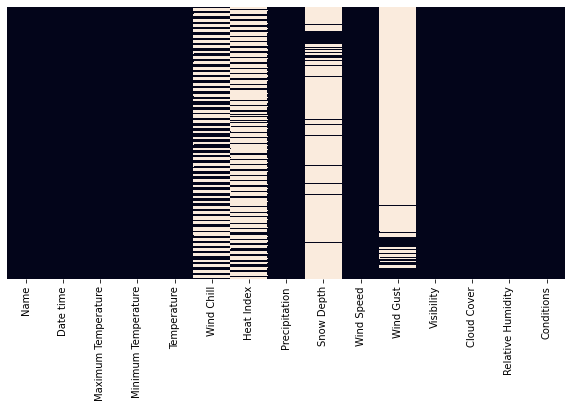

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(df_Usa.isnull(),yticklabels=False,cbar=False,cmap='rocket')

In [7]:
#dropping these columns as there are large no of null values
df_Usa.drop(columns=['Snow Depth','Heat Index','Wind Gust','Wind Chill'],inplace=True)

In [8]:
df_Usa.tail()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
18540,United States,10/28/2020,69.7,61.6,65.3,0.00,11.9,8.6,42.1,87.16,Partially cloudy
18541,United States,10/29/2020,63.5,52.9,58.3,2.25,16.4,6.4,57.1,91.80,"Rain, Partially cloudy"
18542,United States,10/30/2020,53.8,48.6,50.9,0.31,20.5,9.7,89.3,76.92,"Rain, Overcast"
18543,United States,10/31/2020,49.6,40.5,46.6,0.00,14.3,9.9,86.7,69.44,Overcast
18544,United States,11/01/2020,58.6,41.9,51.5,0.51,26.1,9.3,87.1,73.21,"Rain, Overcast"


For now, We will take Temperature and Precipitation as our Dependent variables for regression

In [9]:
#minimum value for temperature
df_Usa['Temperature'].min()

2.2

In [10]:
#maximum value for temperature
df_Usa['Temperature'].max()

93.4

In [11]:
#minimim value for temperature
df_Usa['Precipitation'].min()

0.0

In [12]:
#maximum value for precipitation
df_Usa['Precipitation'].max()

10.0

In [13]:
#ToDO - Update feature details

In [14]:
#Todo:How Windspeed is Effecting Temperature
#Todo: How Humidity affects Temperature

### 3 Feature Engineering

####  Variance Threshold For Temperature

In [15]:
# Using Variance threshold to select variant features and drop constant features for temperature
X=df_Usa.drop(columns=['Temperature','Name','Date time','Maximum Temperature','Minimum Temperature','Conditions'],axis=1)
Y=df_Usa['Temperature']
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [16]:
X.head()

,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity
0,0.00,13.9,12.8,77.9,61.54
1,0.00,17.2,10.0,37.5,59.52
2,0.05,17.2,10.5,73.3,67.34
3,0.00,17.2,9.5,0.0,51.89
4,0.00,15.0,9.3,47.1,65.60


In [17]:
var_thres.get_support()

array([ True,  True,  True,  True,  True])

Variance threshold doesn't give much information as there are no columns with zero variance

####  Variance Threshold For Precipitation

In [18]:
# Using Variance threshold to select variant features and drop constant features for Precipitation
X=df_Usa.drop(columns=['Precipitation','Name','Date time','Conditions'],axis=1)
Y=df_Usa['Precipitation']
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [19]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

Same as with Temperature, Variance threshold doesn't give much information for Precipitation as there are no columns with zero variance

### 3.2 Feature Selection using pearson correlation coefficient

Now let's check relevant features for the model on the basis of correlation with dependent variable Temperature and Precipitation

<AxesSubplot:>

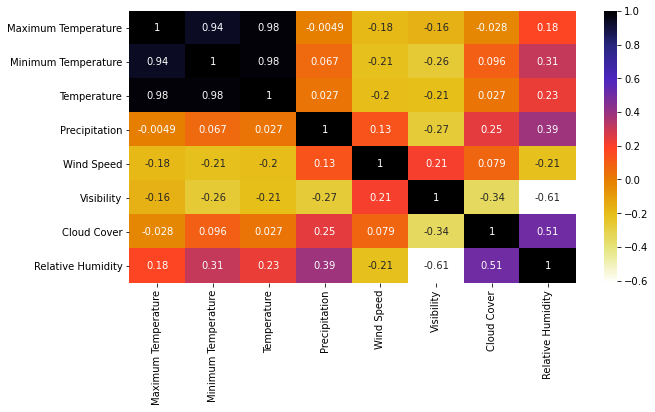

In [20]:
plt.figure(figsize=(10,5))
c= df_Usa.corr()
sns.heatmap(c,cmap='CMRmap_r',annot=True)

Higher the value with the other variable, higher the correlation. Maximum Temperature and Minimum Temperature are highly correalted with Each other and with temperature , but prediction would be obvious in that case, 

Also, for `Temperature` which is one of our dependent varaiable, Temperature is slightly correlated with Relative Humidity and has a slight negative correlation with Visibility and windspeed. Almost negligible correlation with Cloud cover and Precipitation

For `Precipitation`, It is well correlated with Relative humidity, Cloud cover. Negatively correlated with Visibility and maximum temperature

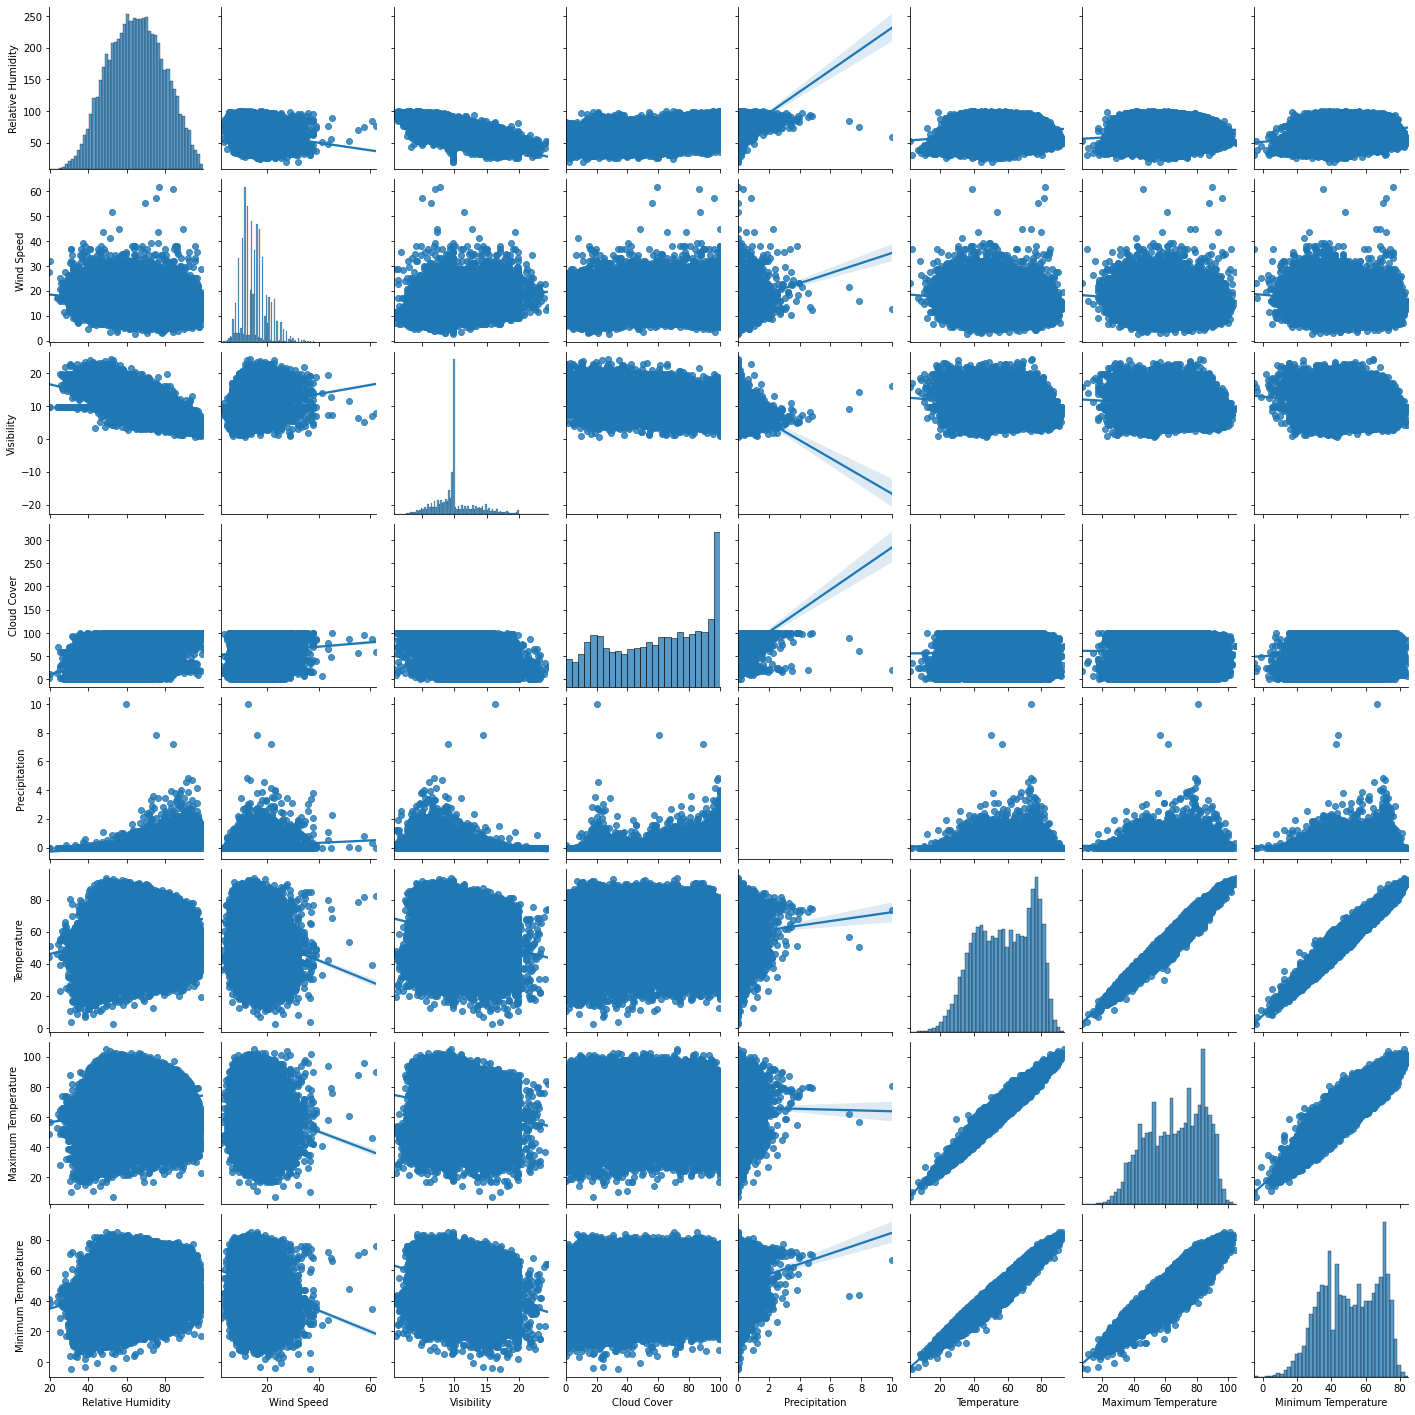

In [23]:
#Taking Temperature,Precipitation as traget and plotting a pairplot of type regression
sns.pairplot(data=df_Usa[['Relative Humidity','Wind Speed','Visibility','Cloud Cover','Precipitation','Temperature','Maximum Temperature',
                         'Minimum Temperature']],kind='reg')

For Temperature, We can see Maximum Temperature, Minimum Temperature and Temperature have a linear relationship, with respect to other features , we can see there is no linear relation with any other feature

For Precipitation, We can see no linear relationship with any other features, majority of values for precipitation lie between 0 and 2

#### 3.3 Using Feature Transformation for conditions

In [21]:
df_Usa['Conditions'] = df_Usa['Conditions'].astype('category')

In [22]:
df_Usa_conditions = pd.get_dummies(df_Usa['Conditions'])

In [23]:
df_Usa  = pd.concat([df_Usa,df_Usa_conditions],axis=1)

In [24]:
df_Usa.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",Snow,"Snow, Overcast","Snow, Partially cloudy"
0,United States,01/01/1970,35.0,28.1,32.0,0.00,13.9,12.8,77.9,61.54,Overcast,0,1,0,0,0,0,0,0,0
1,United States,01/02/1970,41.1,25.1,33.2,0.00,17.2,10.0,37.5,59.52,Partially cloudy,0,0,1,0,0,0,0,0,0
2,United States,01/03/1970,38.0,26.9,33.6,0.05,17.2,10.5,73.3,67.34,"Rain, Partially cloudy",0,0,0,0,0,1,0,0,0
3,United States,01/04/1970,33.2,21.8,27.0,0.00,17.2,9.5,0.0,51.89,Clear,1,0,0,0,0,0,0,0,0
4,United States,01/05/1970,44.0,20.0,30.2,0.00,15.0,9.3,47.1,65.60,Partially cloudy,0,0,1,0,0,0,0,0,0


In [59]:
df_Usa.to_csv("Usa_cleaned.csv")

## Regression

(array([  10.,  118.,  630., 1942., 3039., 2823., 2768., 3176., 3595.,
         444.]),
 array([ 2.2 , 11.32, 20.44, 29.56, 38.68, 47.8 , 56.92, 66.04, 75.16,
        84.28, 93.4 ]),
 <BarContainer object of 10 artists>)

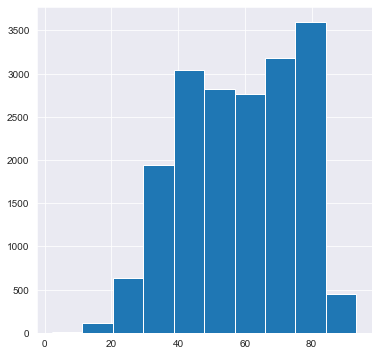

In [60]:
plt.hist(df_Usa['Temperature'])

(array([1.8045e+04, 4.1700e+02, 5.6000e+01, 2.0000e+01, 4.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

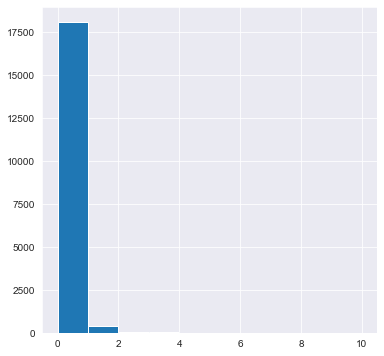

In [61]:
plt.hist(df_Usa['Precipitation'])

In [101]:
df_Usa['Date time']= pd.to_datetime(df_Usa['Date time'])
df_Usa['Date time'].dtype

dtype('<M8[ns]')

#### Segregating variables: Independent and Dependent Variables for Temperature

In [102]:
# Considering WindSpeed, Visibility and Relative Humidity
X_temp=df_Usa.drop(columns=['Maximum Temperature','Minimum Temperature','Temperature','Precipitation',
                            'Conditions','Name','Date time','Cloud Cover'],axis=1)
Y_temp=df_Usa.Temperature
X_Date = df_Usa[['Date time']]

#### Importing the train test split function for Temperature

In [104]:
from sklearn.model_selection import train_test_split
train_X_temp,test_X_temp,train_y_temp,test_y_temp = train_test_split(X_temp,Y_temp,test_size=0.3,shuffle=False)
train_X_Date,test_X_Date,train_y_temp,test_y_temp = train_test_split(X_Date,Y_temp,test_size=0.3,shuffle=False)

In [105]:
train_X_temp.head()

,Wind Speed,Visibility,Relative Humidity,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",Snow,"Snow, Overcast","Snow, Partially cloudy"
0,13.9,12.8,61.54,0,1,0,0,0,0,0,0,0
1,17.2,10.0,59.52,0,0,1,0,0,0,0,0,0
2,17.2,10.5,67.34,0,0,0,0,0,1,0,0,0
3,17.2,9.5,51.89,1,0,0,0,0,0,0,0,0
4,15.0,9.3,65.60,0,0,1,0,0,0,0,0,0


In [106]:
train_y_temp.head()

0    32.0
1    33.2
2    33.6
3    27.0
4    30.2
Name: Temperature, dtype: float64

In [107]:
test_X_Date.reset_index(inplace=True)
test_X_Date.drop(columns=['index'],inplace=True)
test_X_Date.head()

,Date time
0,2005-07-24
1,2005-07-25
2,2005-07-26
3,2005-07-27
4,2005-07-28


In [108]:
#getting the shape for training data
train_X_temp.shape

(12981, 12)

In [109]:
train_y_temp.shape

(12981,)

In [110]:
#getting the shape for test data
test_X_temp.shape

(5564, 12)

### 1. Implementing Linear Regression

In [111]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score,KFold
import math

In [112]:
lr = LR(normalize=True)
kfold = KFold(n_splits=10)#using KFold cross validation
mse_scores = -np.round(cross_val_score(lr,train_X_temp,train_y_temp,scoring='neg_mean_squared_error',cv=kfold))
rmse_scores=[math.sqrt(i) for i in mse_scores]
print(rmse_scores)

print('**********************')
print('Cross_Validation_Root_Mean_Score_Error Mean:{}'.format(np.mean(rmse_scores)))

[15.491933384829668, 14.696938456699069, 14.7648230602334, 15.033296378372908, 14.89966442575134, 13.92838827718412, 14.798648586948742, 14.866068747318506, 15.588457268119896, 15.198684153570664]
**********************
Cross_Validation_Root_Mean_Score_Error Mean:14.926690273902832


Text(0, 0.5, 'Root Mean Square Error')

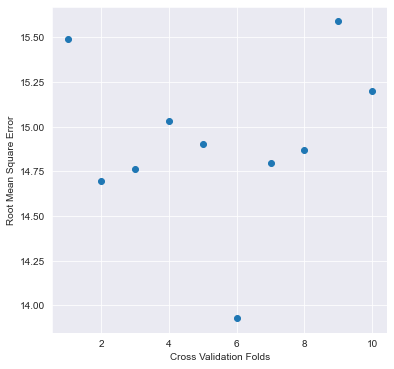

In [113]:
#Plot cross validation  vs root mean square error
sns.set_style('darkgrid')
x_val = [i for i in range(1,11)]
plt.scatter(x_val,rmse_scores)
plt.xlabel("Cross Validation Folds")
plt.ylabel("Root Mean Square Error")

In [114]:
# Predicting over the Train Set and calculating error
lr.fit(train_X_temp,train_y_temp)
train_predict = lr.predict(train_X_temp)
linear_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(linear_train_error) )

Training Root Mean Squared Error 14.853065692694015


In [115]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_X_temp)
linear_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(linear_test_error))
linear_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Linear regression',linear_r2_score)

Test Root Mean Squared Error 15.982722578403875
R2 Square Error for Linear regression 0.11057993149245426


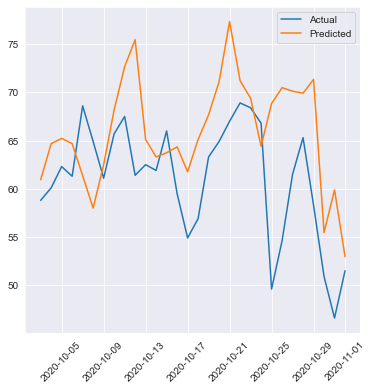

In [116]:
#Predicting over the last 1 month
plt.plot(test_X_Date['Date time'][-30:],test_y_temp[-30:],label='Actual')
plt.plot(test_X_Date['Date time'][-30:],test_predict[-30:],label='Predicted')
plt.xticks(rotation=45)
plt.legend()

### Residual Plot in Linear Regression

Text(0.5, 1.0, 'Residual plot in Linear Regression')

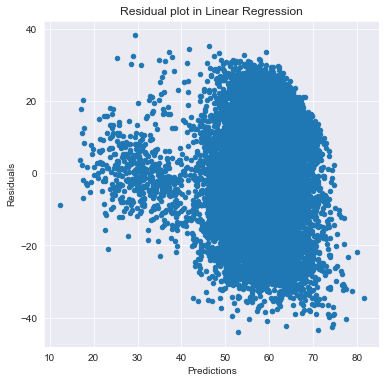

In [117]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":lr.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Linear Regression")

### Knn Algorithm

In [133]:
from sklearn.preprocessing import StandardScaler

x_scaled=StandardScaler()
train_X_temp[['Wind Speed','Visibility','Relative Humidity']] = x_scaled.fit_transform(train_X_temp[['Wind Speed','Visibility','Relative Humidity']])

x_test_scaled= StandardScaler()
test_X_temp[['Wind Speed','Visibility','Relative Humidity']]=x_test_scaled.fit_transform(test_X_temp[['Wind Speed','Visibility','Relative Humidity']])

In [134]:
from sklearn import neighbors
n_neighbors=18 #came up with 18 after hyper-paramter tuning for nearest neighbours
knn=neighbors.KNeighborsRegressor(n_neighbors,leaf_size=1,n_jobs=-1,algorithm='brute')
mse_scores = -np.round(cross_val_score(knn,train_X_temp,train_y_temp,scoring='neg_mean_squared_error',cv=kfold))
rmse_scores=[math.sqrt(i) for i in mse_scores]
print(rmse_scores)

print('**********************')
print('Cross_Validation_Root_Mean_Score_Error Mean:{}'.format(np.mean(rmse_scores)))

[14.730919862656235, 14.2828568570857, 14.035668847618199, 14.212670403551895, 14.0, 13.076696830622021, 13.638181696985855, 14.177446878757825, 14.933184523068078, 14.247806848775006]
**********************
Cross_Validation_Root_Mean_Score_Error Mean:14.13354327491208


In [135]:
# Predicting over the Train Set and calculating error
knn.fit(train_X_temp,train_y_temp)
train_predict = knn.predict(train_X_temp)
knn_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(knn_train_error) )

Training Root Mean Squared Error 13.251075150709514


In [136]:
# Predicting over the Test Set and calculating error
test_predict = knn.predict(test_X_temp)
knn_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(knn_test_error) )
knn_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for KNN regression',knn_r2_score)

Test Root Mean Squared Error 15.390913849719935
R2 Square Error for KNN regression 0.1752274155650385


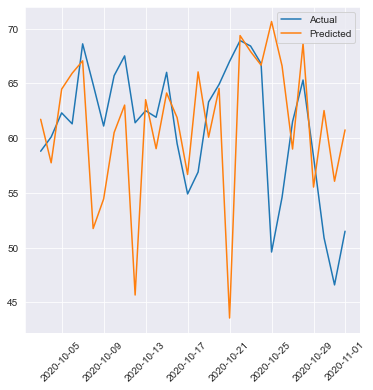

In [137]:
#Predicting over the last 1 month
plt.plot(test_X_Date['Date time'][-30:],test_y_temp[-30:],label='Actual')
plt.plot(test_X_Date['Date time'][-30:],test_predict[-30:],label='Predicted')
plt.xticks(rotation=45)
plt.legend()

### Residual plot in KNN

Text(0.5, 1.0, 'Residual plot in KNN Regression')

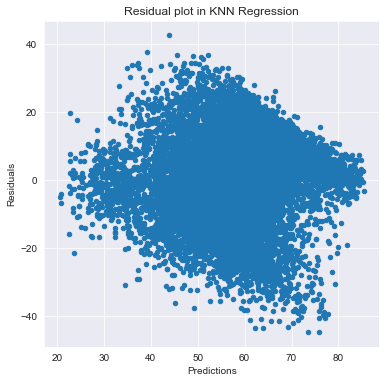

In [138]:
preds = pd.DataFrame({"preds":knn.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in KNN Regression")

### Gradient Boosting Regressor

In [139]:
from xgboost import XGBRegressor
warnings.filterwarnings('ignore')
xgb = XGBRegressor()
mse_scores = -np.round(cross_val_score(xgb,train_X_temp,train_y_temp,scoring='neg_mean_squared_error',cv=kfold))
rmse_scores=[math.sqrt(i) for i in mse_scores]
print(rmse_scores)

print('**********************')
print('Cross_Validation_Root_Mean_Score_Error Mean:{}'.format(np.mean(rmse_scores)))

[20:02:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:02:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:02:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:02:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:02:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:02:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:02:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:02:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:02:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [140]:
# Predicting over the Train Set and calculating error
xgb.fit(train_X_temp,train_y_temp)
train_predict = xgb.predict(train_X_temp)
xgb_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(xgb_train_error) )

[20:02:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Root Mean Squared Error 13.565449990249197


In [141]:
# Predicting over the Test Set and calculating error
test_predict = xgb.predict(test_X_temp)
xgb_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(xgb_test_error) )
xgb_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Gradient Boosting regression',xgb_r2_score)

Test Root Mean Squared Error 15.147350615222166
R2 Square Error for Gradient Boosting regression 0.2011251329172581


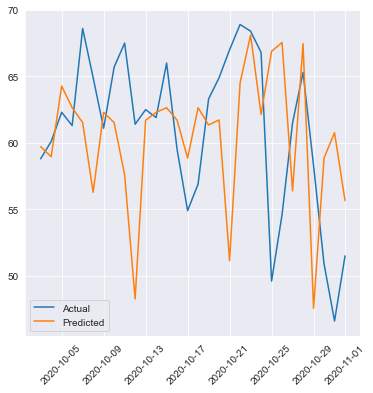

In [142]:
#Predicting over the last 1 month
plt.plot(test_X_Date['Date time'][-30:],test_y_temp[-30:],label='Actual')
plt.plot(test_X_Date['Date time'][-30:],test_predict[-30:],label='Predicted')
plt.xticks(rotation=45)
plt.legend()

### Decision Tree Regressor

In [143]:
from sklearn import tree
#Paraemeters passed here are tuned using Hyper-parameter tuning
dec = tree.DecisionTreeRegressor(max_features="auto",min_samples_leaf=10,min_samples_split=9,max_depth=9)
mse_scores = -np.round(cross_val_score(dec,train_X_temp,train_y_temp,scoring='neg_mean_squared_error',cv=kfold))
rmse_scores=[math.sqrt(i) for i in mse_scores]
print(rmse_scores)

print('**********************')
print('Cross_Validation_Root_Mean_Score_Error Mean:{}'.format(np.mean(rmse_scores)))

[14.866068747318506, 14.352700094407323, 14.247806848775006, 14.66287829861518, 14.317821063276353, 13.416407864998739, 13.892443989449804, 14.422205101855956, 14.866068747318506, 14.2828568570857]
**********************
Cross_Validation_Root_Mean_Score_Error Mean:14.332725761310106


In [144]:
# Predicting over the Train Set and calculating error
dec.fit(train_X_temp,train_y_temp)
train_predict = dec.predict(train_X_temp)
dec_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(dec_train_error) )

Training Root Mean Squared Error 13.61889606396696


In [145]:
# Predicting over the Test Set and calculating error
test_predict = dec.predict(test_X_temp)
dec_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(dec_test_error) )
dc_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Decision Tree regression',dc_r2_score)

Test Root Mean Squared Error 15.68973240051345
R2 Square Error for Decision Tree regression 0.1428901720136918


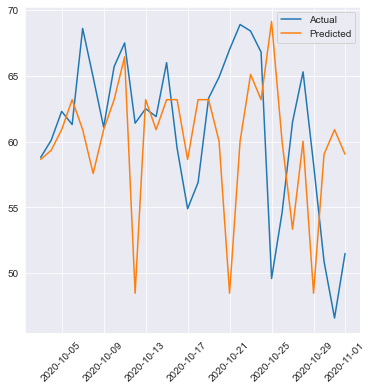

In [146]:
#Predicting over the last 1 month
plt.plot(test_X_Date['Date time'][-30:],test_y_temp[-30:],label='Actual')
plt.plot(test_X_Date['Date time'][-30:],test_predict[-30:],label='Predicted')
plt.xticks(rotation=45)
plt.legend()

### Residual Plot in Decision Tree Regressor

Text(0.5, 1.0, 'Residual plot in Decision Tree Regression')

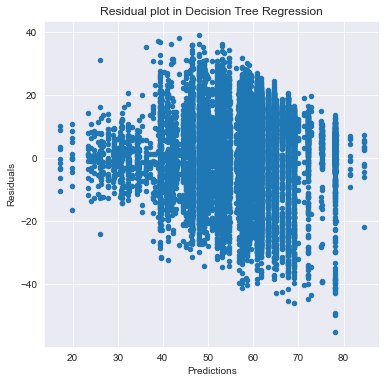

In [147]:
preds = pd.DataFrame({"preds":dec.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Decision Tree Regression")

### 3. Support Vector Regression for Temperature

#### Pre processing features

In [148]:
from sklearn.svm import SVR

model1=SVR(kernel="rbf",C=12) #Came up with parameters after parameter tuning
mse_scores = -np.round(cross_val_score(model1,train_X_temp,train_y_temp,scoring='neg_mean_squared_error',cv=kfold))
rmse_scores=[math.sqrt(i) for i in mse_scores]
print(rmse_scores)

print('**********************')
print('Cross_Validation_Root_Mean_Score_Error Mean:{}'.format(np.mean(rmse_scores)))

[14.798648586948742, 14.560219778561036, 13.674794331177344, 14.142135623730951, 14.035668847618199, 13.19090595827292, 13.228756555322953, 14.2828568570857, 14.933184523068078, 14.071247279470288]
**********************
Cross_Validation_Root_Mean_Score_Error Mean:14.09184183412562


In [150]:
# Predicting over the Train Set and calculating error
model1.fit(train_X_temp,train_y_temp)
train_predict = model1.predict(train_X_temp)
svm_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(svm_train_error) )

Training Root Mean Squared Error 13.79113569088323


In [151]:
# Predicting over the Test Set and calculating error
test_predict = model1.predict(test_X_temp)
svm_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(svm_test_error) )
svm_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for SVM regression',svm_r2_score)

Test Root Mean Squared Error 15.628778949208192
R2 Square Error for SVM regression 0.14953685268056582


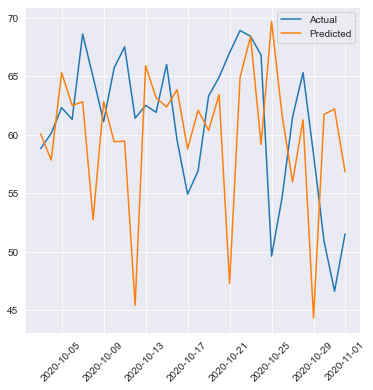

In [163]:
#Predicting over the last 1 month
plt.plot(test_X_Date['Date time'][-30:],test_y_temp[-30:],label='Actual')
plt.plot(test_X_Date['Date time'][-30:],test_predict[-30:],label='Predicted')
plt.xticks(rotation=45)
plt.legend()

### Residual Plot for Support Vector Machine

Text(0.5, 1.0, 'Residual plot in Support Vector Regression')

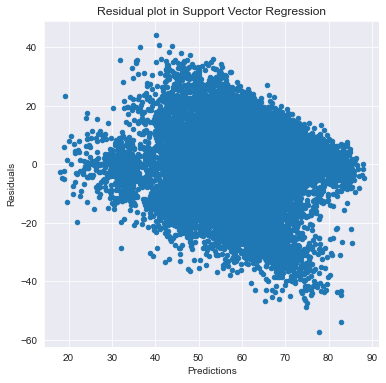

In [164]:
preds = pd.DataFrame({"preds":model1.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Support Vector Regression")

### Getting the Graph for all Models RMSE

In [165]:
train_error=[linear_train_error,knn_train_error,xgb_train_error,dec_train_error,svm_train_error]
test_error=[linear_test_error,knn_test_error,xgb_test_error,dec_test_error,svm_test_error]

col={'Train RMSE':[math.sqrt(i) for i in train_error],
         'Test RMSE':[math.sqrt(i) for i in test_error]}
models=['Linear Regression','K-Nearest','Gradient Boost','Decision Tree','SVM']
df=pd.DataFrame(data=col,index=models)
df

,Train RMSE,Test RMSE
Linear Regression,14.853066,15.982723
K-Nearest,13.251075,15.390914
Gradient Boost,13.565450,15.147351
Decision Tree,13.618896,15.689732
SVM,13.791136,15.628779


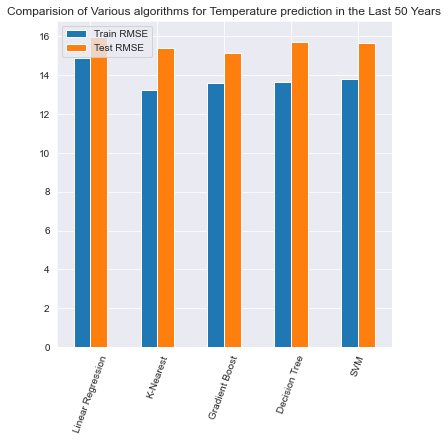

In [155]:
df.plot(kind='bar')
plt.xticks(rotation=70)
plt.title("Comparision of Various algorithms for Temperature prediction in the Last 50 Years")
plt.show()

### Getting the Graph for all Models Test R2 Square Error

In [157]:
test_r2_square_error=[linear_r2_score,knn_r2_score,xgb_r2_score,dc_r2_score,svm_r2_score]

col={'Test R2 Square Error':[i for i in test_r2_square_error]}
models=['Ridge Regression','K-Nearest','Gradent Boost','Decision Tree','SVM']
df=pd.DataFrame(data=col,index=models)
df

,Test R2 Square Error
Ridge Regression,0.110580
K-Nearest,0.175227
Gradent Boost,0.201125
Decision Tree,0.142890
SVM,0.149537


Text(0.5, 1.0, 'R2 Square for Various Models')

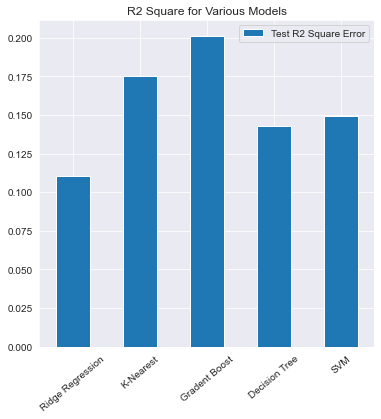

In [158]:
df.plot(kind='bar')
plt.xticks(rotation=40)
plt.title("R2 Square for Various Models")

#### Segregating variables: Independent and Dependent Variables for Precipitation

In [160]:
X_prec=df_Usa.drop(columns=['Precipitation','Conditions','Name','Date time'],axis=1)
Y_prec=df_Usa.Precipitation

In [161]:
X_prec.head()

,Maximum Temperature,Minimum Temperature,Temperature,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",Snow,"Snow, Overcast","Snow, Partially cloudy"
0,35.0,28.1,32.0,13.9,12.8,77.9,61.54,0,1,0,0,0,0,0,0,0
1,41.1,25.1,33.2,17.2,10.0,37.5,59.52,0,0,1,0,0,0,0,0,0
2,38.0,26.9,33.6,17.2,10.5,73.3,67.34,0,0,0,0,0,1,0,0,0
3,33.2,21.8,27.0,17.2,9.5,0.0,51.89,1,0,0,0,0,0,0,0,0
4,44.0,20.0,30.2,15.0,9.3,47.1,65.60,0,0,1,0,0,0,0,0,0


#### Importing the train test split function for Precipitation

In [177]:
from sklearn.model_selection import train_test_split
train_X_prec,test_X_prec,train_y_prec,test_y_prec = train_test_split(X_prec,Y_prec,test_size=0.35,shuffle=False)

### Multi Linear Regression

In [178]:
lr = LR(normalize=True)
lr.fit(train_X_prec,train_y_prec)
y_predict=lr.predict(test_X_prec)

In [179]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_X_prec)
linear_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(linear_train_error) )

Training Root Mean Squared Error 0.2685547693657833


In [180]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_X_prec)
linear_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(linear_test_error) )

Test Root Mean Squared Error 0.29616878616696624


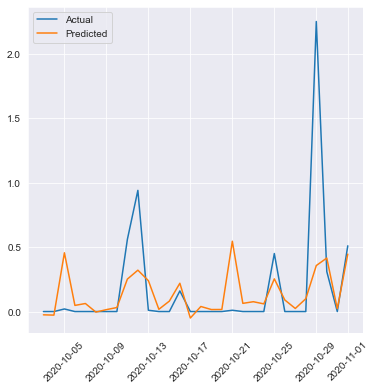

In [181]:
#Predicting over the last 1 month
plt.plot(test_X_Date['Date time'][-30:],test_y_prec[-30:],label='Actual')
plt.plot(test_X_Date['Date time'][-30:],test_predict[-30:],label='Predicted')
plt.xticks(rotation=45)
plt.legend()

### Knn Algorithm

In [182]:
from sklearn.preprocessing import StandardScaler

x_scaled=StandardScaler()
train_X_prec[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']] = x_scaled.fit_transform(train_X_prec[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']])

x_test_scaled= StandardScaler()
test_X_prec[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']]=x_test_scaled.fit_transform(test_X_prec[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']])

In [183]:
from sklearn import neighbors
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(train_X_prec,train_y_prec)
y1_knn=knn.predict(test_X_prec)

In [184]:
# Predicting over the Train Set and calculating error
train_predict = knn.predict(train_X_prec)
knn_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(knn_train_error) )

Training Root Mean Squared Error 0.23275481815809712


In [185]:
# Predicting over the Test Set and calculating error
test_predict = knn.predict(test_X_prec)
knn_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(knn_test_error) )

Test Root Mean Squared Error 0.3140485259637287


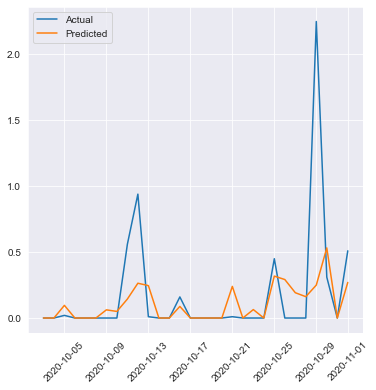

In [187]:
#Predicting over the last 1 month
plt.plot(test_X_Date['Date time'][-30:],test_y_prec[-30:],label='Actual')
plt.plot(test_X_Date['Date time'][-30:],test_predict[-30:],label='Predicted')
plt.xticks(rotation=45)
plt.legend()

### Decision Tree Regressor

In [188]:
from sklearn import tree
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(train_X_prec,train_y_prec)

DecisionTreeRegressor(max_depth=1)

In [189]:
# Predicting over the Train Set and calculating error
train_predict = dec.predict(train_X_prec)
dec_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(dec_train_error) )

Training Root Mean Squared Error 0.2850215801889403


In [190]:
# Predicting over the Test Set and calculating error
test_predict = dec.predict(test_X_prec)
dec_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(dec_test_error))

Test Root Mean Squared Error 0.32379218955791667


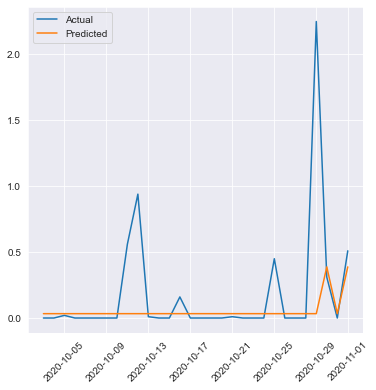

In [191]:
#Predicting over the last 1 month
plt.plot(test_X_Date['Date time'][-30:],test_y_prec[-30:],label='Actual')
plt.plot(test_X_Date['Date time'][-30:],test_predict[-30:],label='Predicted')
plt.xticks(rotation=45)
plt.legend()

### Gradient Boosting Regressor

In [195]:
xgb = XGBRegressor()
xgb.fit(train_X_prec,train_y_prec)

[20:12:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [196]:
# Predicting over the Train Set and calculating error
train_predict = xgb.predict(train_X_prec)
xgb_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(xgb_train_error) )

Training Root Mean Squared Error 0.2313638448389772


In [197]:
# Predicting over the Test Set and calculating error
test_predict = xgb.predict(test_X_prec)
xgb_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(xgb_test_error) )

Test Root Mean Squared Error 0.34154708271226525


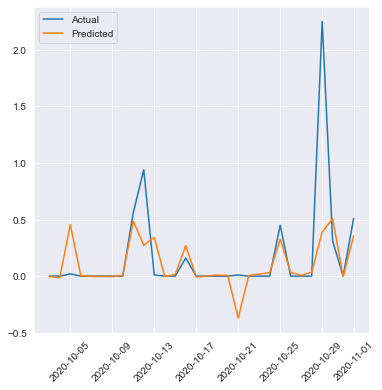

In [198]:
#Predicting over the last 1 month
plt.plot(test_X_Date['Date time'][-30:],test_y_prec[-30:],label='Actual')
plt.plot(test_X_Date['Date time'][-30:],test_predict[-30:],label='Predicted')
plt.xticks(rotation=45)
plt.legend()

###  Support Vector Regression for Precipitation

In [199]:
from sklearn.svm import SVR

model1=SVR(kernel="linear")

model1.fit(train_X_prec,train_y_prec)
pred1=model1.predict(test_X_prec)

In [200]:
# Predicting over the Train Set and calculating error
train_predict = model1.predict(train_X_prec)
svm_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(svm_train_error) )

Training Root Mean Squared Error 0.27907895078129563


In [201]:
# Predicting over the Test Set and calculating error
test_predict = model1.predict(test_X_prec)
svm_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(svm_test_error))

Test Root Mean Squared Error 0.30572237416205417


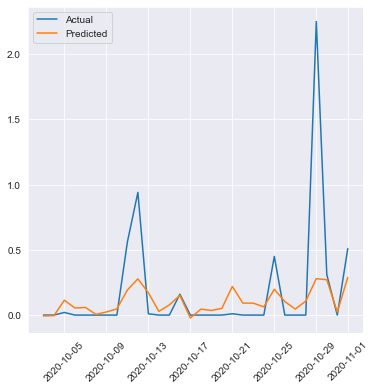

In [202]:
#Predicting over the last 1 month
plt.plot(test_X_Date['Date time'][-30:],test_y_prec[-30:],label='Actual')
plt.plot(test_X_Date['Date time'][-30:],test_predict[-30:],label='Predicted')
plt.xticks(rotation=45)
plt.legend()

### Getting the Graph for all Models RMSE

In [203]:
train_error=[ridge_train_error,knn_train_error,dec_train_error,svm_train_error,xgb_train_error]
test_error=[ridge_test_error,knn_test_error,dec_test_error,svm_test_error,xgb_test_error]

col={'Train RMSE':[math.sqrt(i) for i in train_error],
         'Test RMSE':[math.sqrt(i) for i in test_error]}
models=['Ridge Regression','K-Nearest','Decision Tree','SVM','Gradient Boost']
df=pd.DataFrame(data=col,index=models)
df

,Train RMSE,Test RMSE
Ridge Regression,0.268555,0.295787
K-Nearest,0.232755,0.314049
Decision Tree,0.285022,0.323792
SVM,0.279079,0.305722
Gradient Boost,0.231364,0.341547


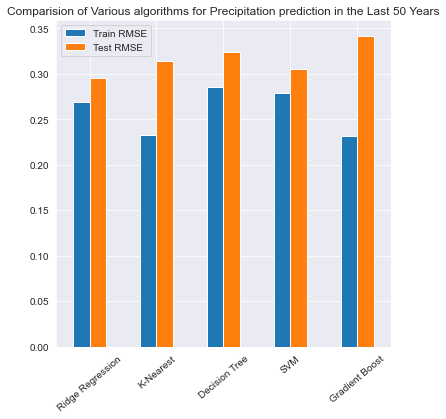

In [204]:
df.plot(kind='bar')
plt.xticks(rotation=40)
plt.title("Comparision of Various algorithms for Precipitation prediction in the Last 50 Years")
plt.show()